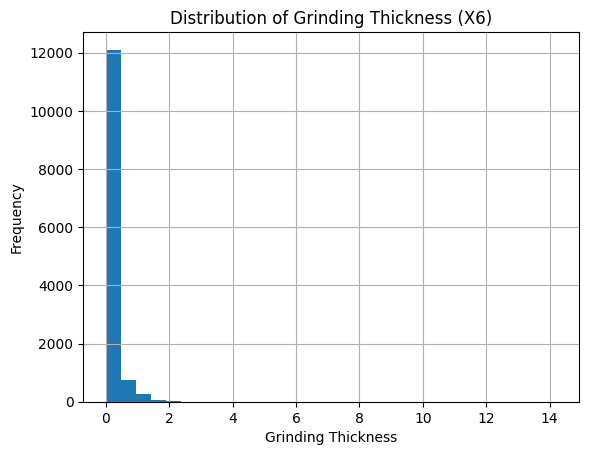

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../Dataset/mixed_categorical_numerical_data.csv')
data['X6'].hist(bins=30)
plt.title('Distribution of Grinding Thickness (X6)')
plt.xlabel('Grinding Thickness')
plt.ylabel('Frequency')
plt.show()


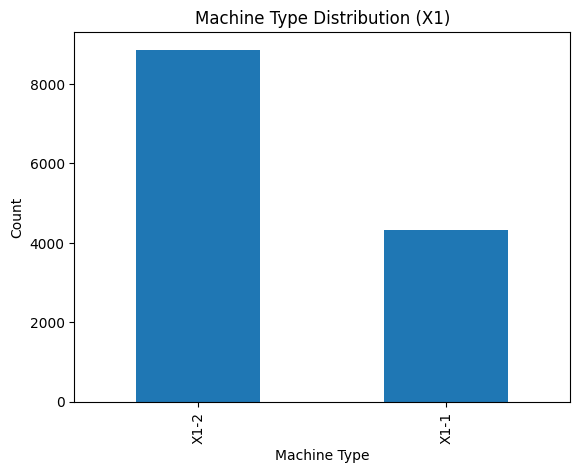

In [3]:
data['X1'].value_counts().plot(kind='bar')
plt.title('Machine Type Distribution (X1)')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.show()


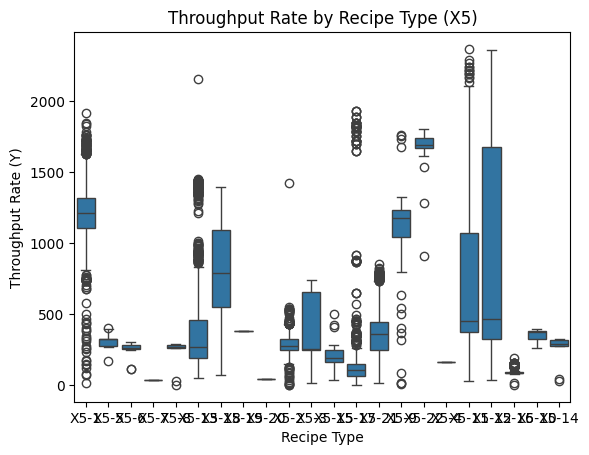

In [4]:
import seaborn as sns

sns.boxplot(x='X5', y='Y', data=data)
plt.title('Throughput Rate by Recipe Type (X5)')
plt.xlabel('Recipe Type')
plt.ylabel('Throughput Rate (Y)')
plt.show()


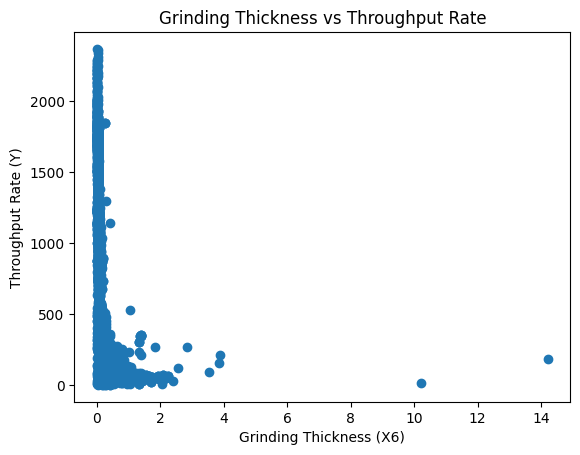

In [5]:
plt.scatter(data['X6'], data['Y'])
plt.title('Grinding Thickness vs Throughput Rate')
plt.xlabel('Grinding Thickness (X6)')
plt.ylabel('Throughput Rate (Y)')
plt.show()


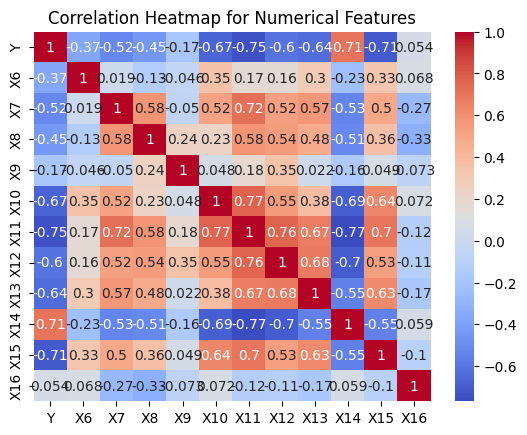

In [12]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation for numeric columns
correlation = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


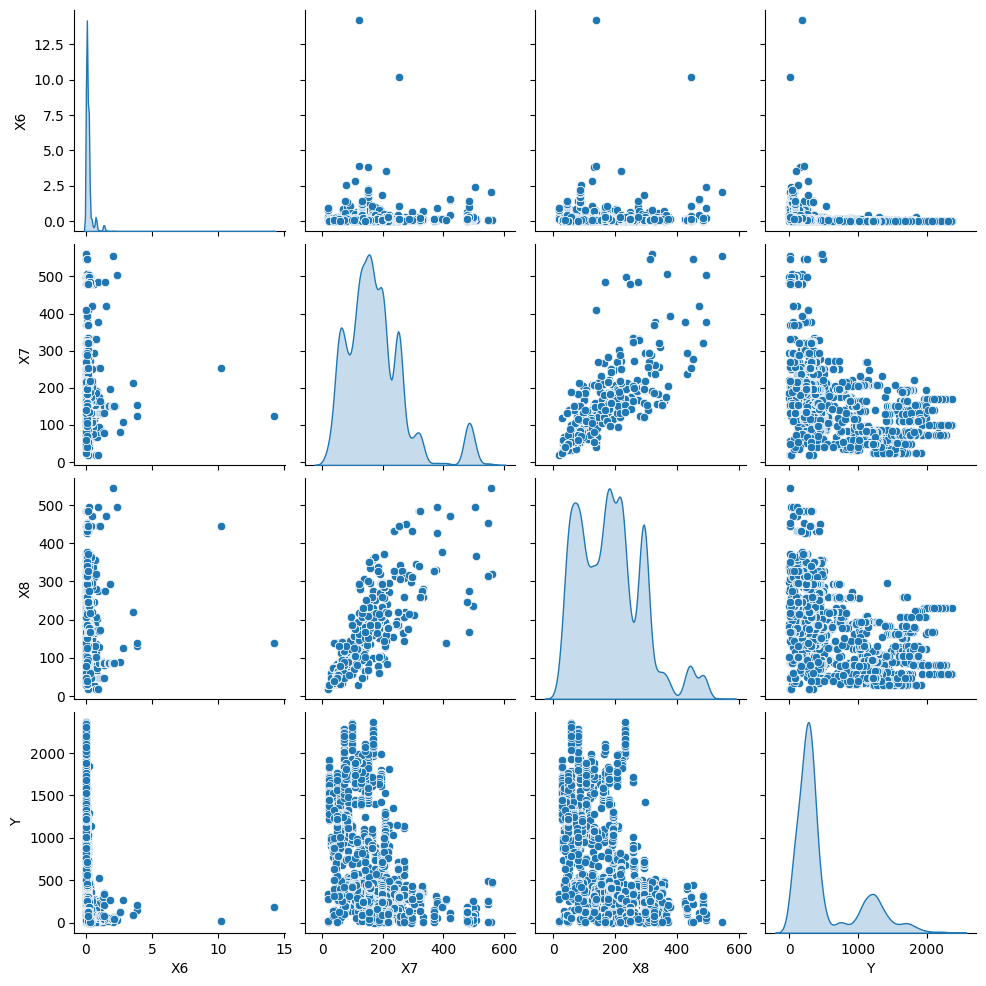

In [7]:
sns.pairplot(data, vars=['X6', 'X7', 'X8', 'Y'], diag_kind='kde')
plt.show()


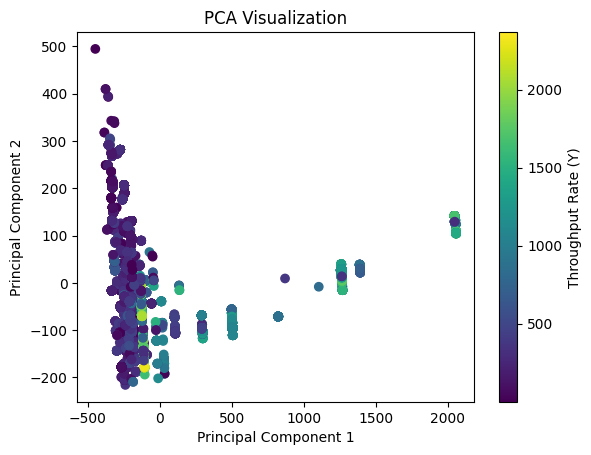

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../Dataset/mixed_categorical_numerical_data.csv')

pca = PCA(n_components=2)
numeric_data = data.drop(columns=['X1', 'X2', 'X3', 'X4', 'X5', 'Y'])
pca_result = pca.fit_transform(numeric_data)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Y'], cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Throughput Rate (Y)')
plt.show()


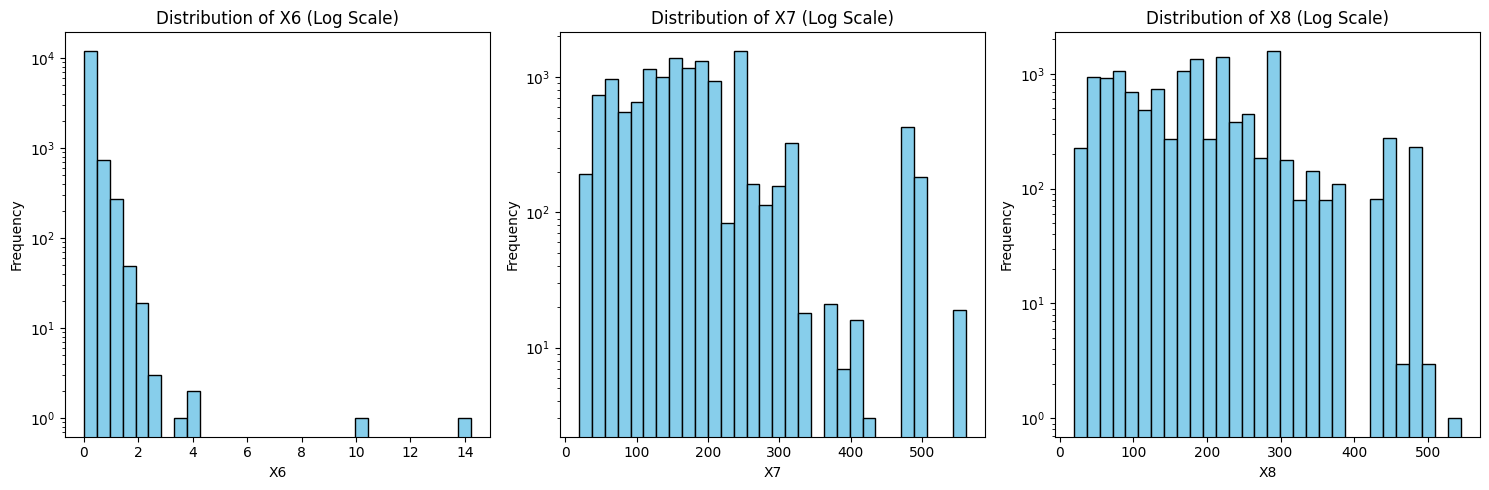

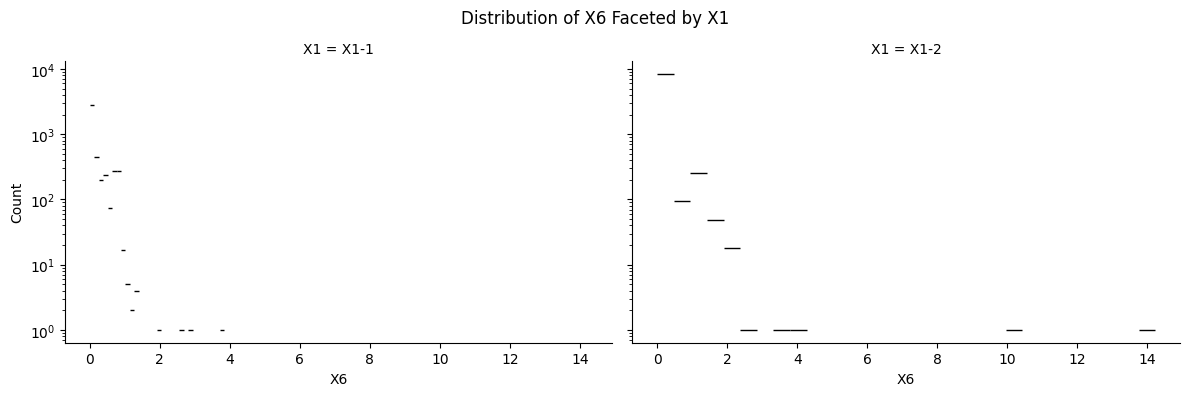

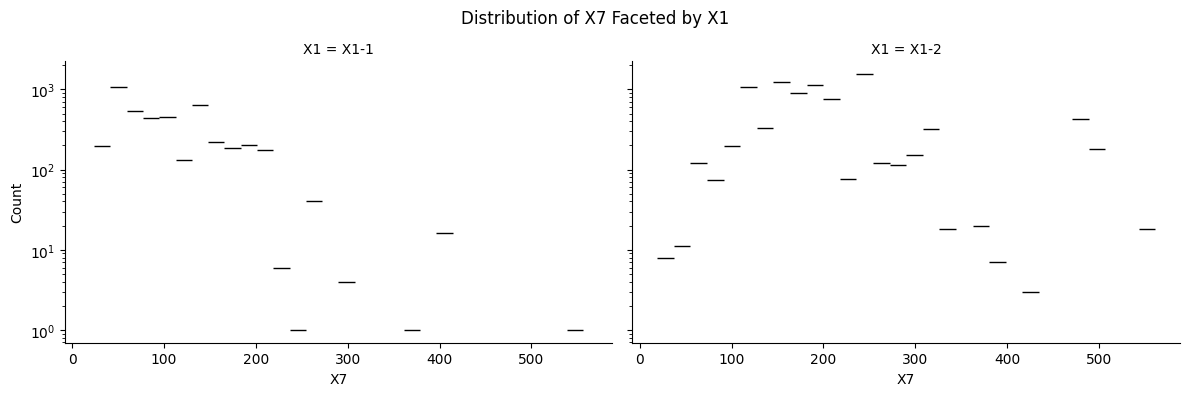

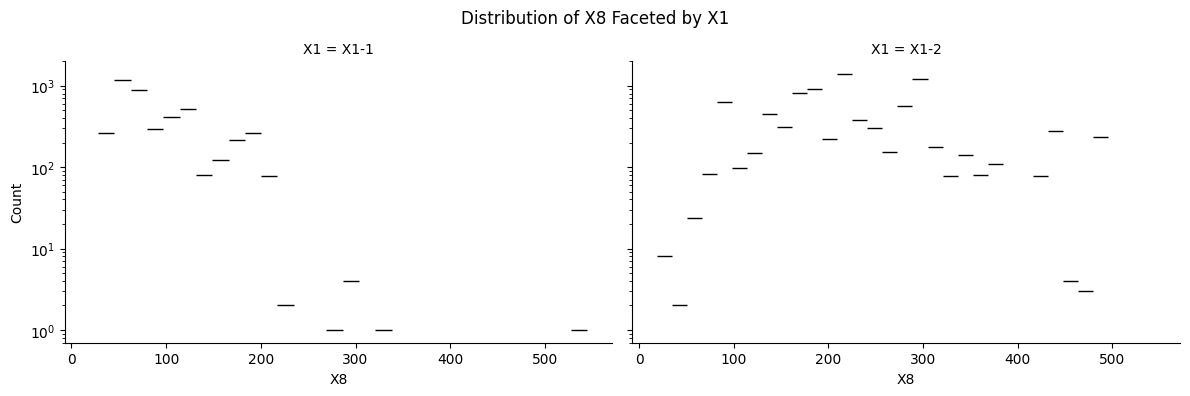

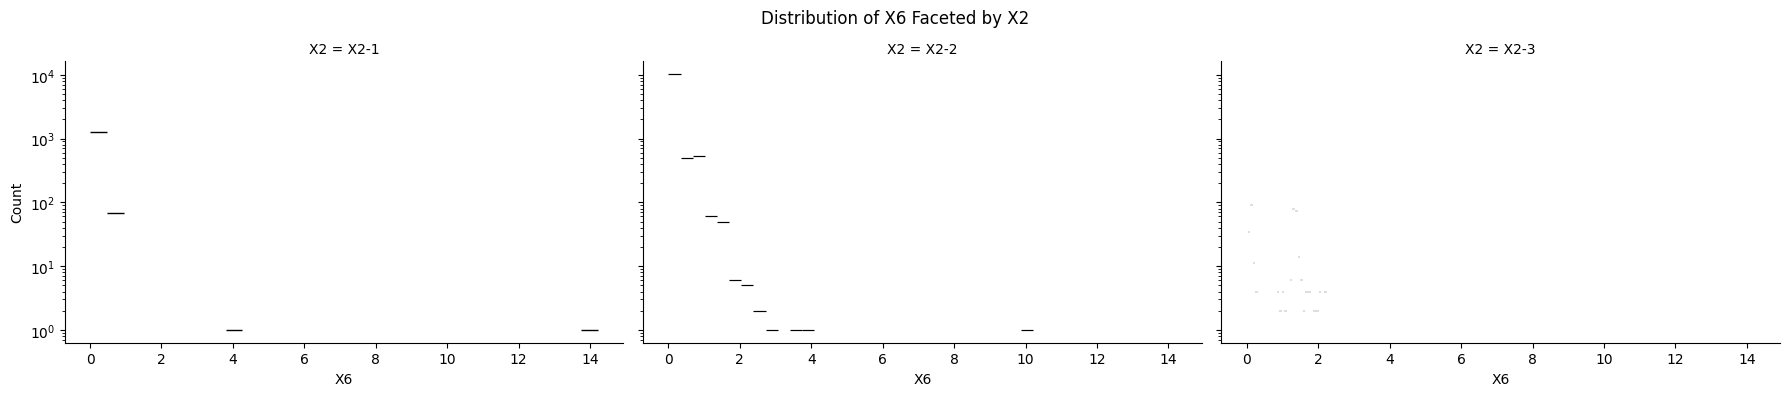

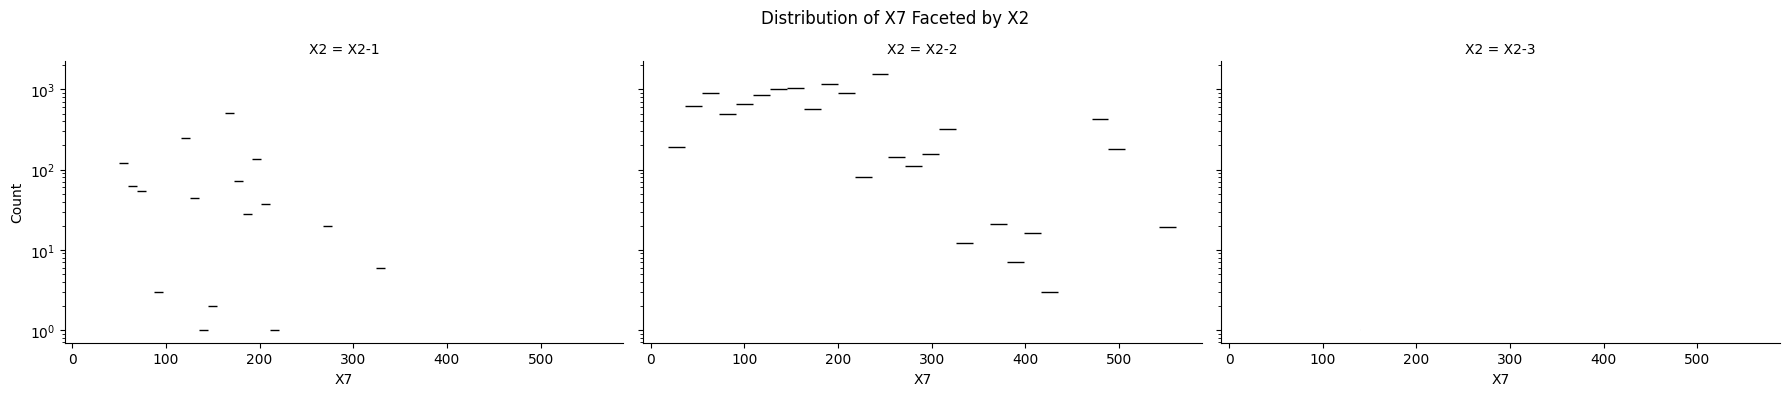

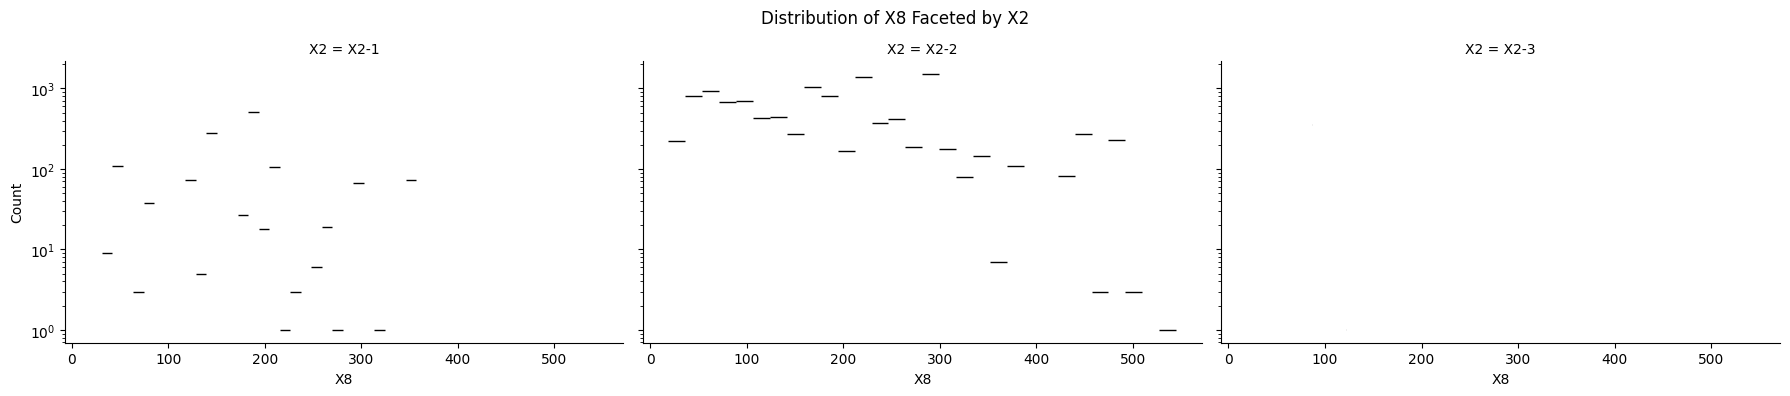

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Features to analyze
numerical_features = ['X6', 'X7', 'X8']
categorical_features = ['X1', 'X2']

# Distribution analysis: Numerical features (Histograms)
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    axes[i].hist(data[feature], bins=30, color='skyblue', edgecolor='black', log=True)
    axes[i].set_title(f'Distribution of {feature} (Log Scale)')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Faceted histograms for comparing distributions across categories (e.g., X1, X2)
for cat_feature in categorical_features:
    for num_feature in numerical_features:
        g = sns.FacetGrid(data, col=cat_feature, height=4, aspect=1.5)
        g.map(sns.histplot, num_feature, kde=False, bins=30, log_scale=(False, True), color='coral', edgecolor='black')
        g.fig.subplots_adjust(top=0.85)
        g.fig.suptitle(f'Distribution of {num_feature} Faceted by {cat_feature}')
        plt.show()


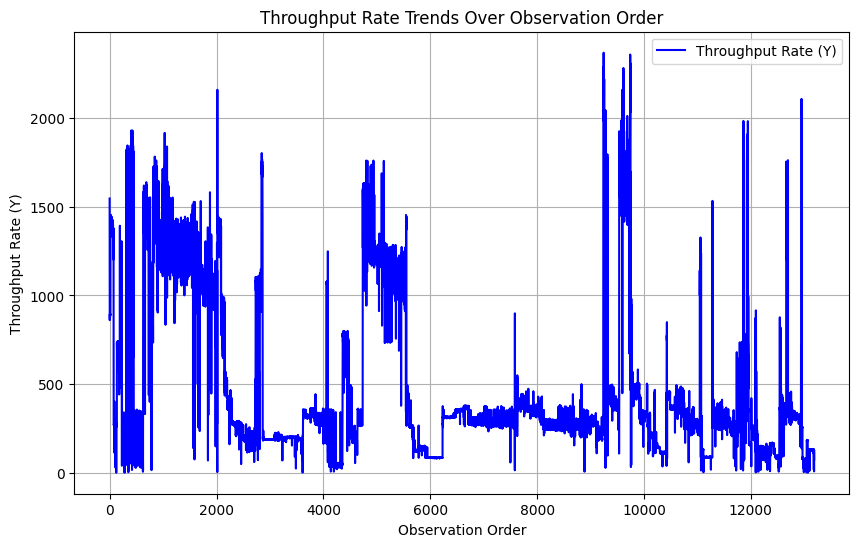

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../Dataset/mixed_categorical_numerical_data.csv'
data = pd.read_csv(file_path)

# Line Chart: Throughput Rate (Y) Trends Over Time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Y'], color='blue', label='Throughput Rate (Y)')
plt.title('Throughput Rate Trends Over Observation Order')
plt.xlabel('Observation Order')
plt.ylabel('Throughput Rate (Y)')
plt.legend()
plt.grid(True)
plt.show()


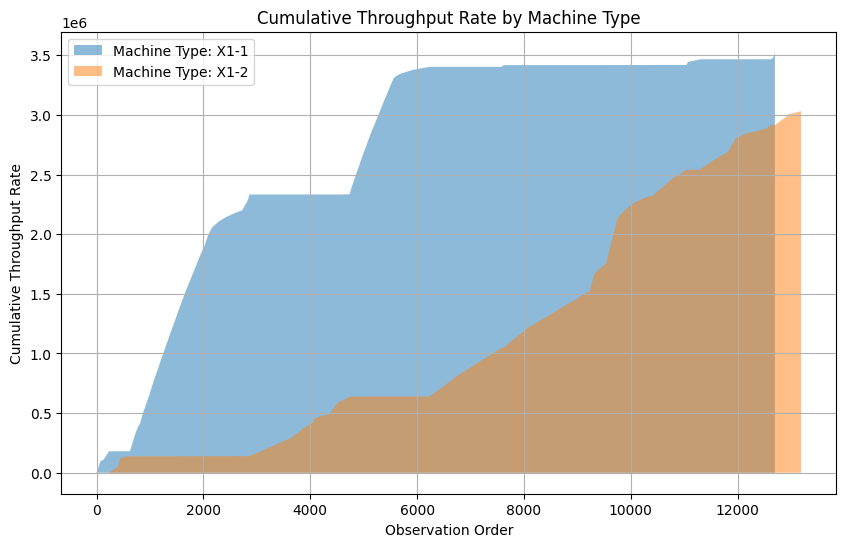

In [3]:
# Group data by machine type (X1) and calculate cumulative throughput rate
machine_group = data.groupby('X1')['Y'].cumsum()

# Add cumulative sum to the dataset
data['Cumulative_Y'] = machine_group

# Plot Area Chart
plt.figure(figsize=(10, 6))
for machine_type in data['X1'].unique():
    machine_data = data[data['X1'] == machine_type]
    plt.fill_between(
        machine_data.index,
        machine_data['Cumulative_Y'],
        label=f'Machine Type: {machine_type}',
        alpha=0.5
    )

plt.title('Cumulative Throughput Rate by Machine Type')
plt.xlabel('Observation Order')
plt.ylabel('Cumulative Throughput Rate')
plt.legend()
plt.grid(True)
plt.show()


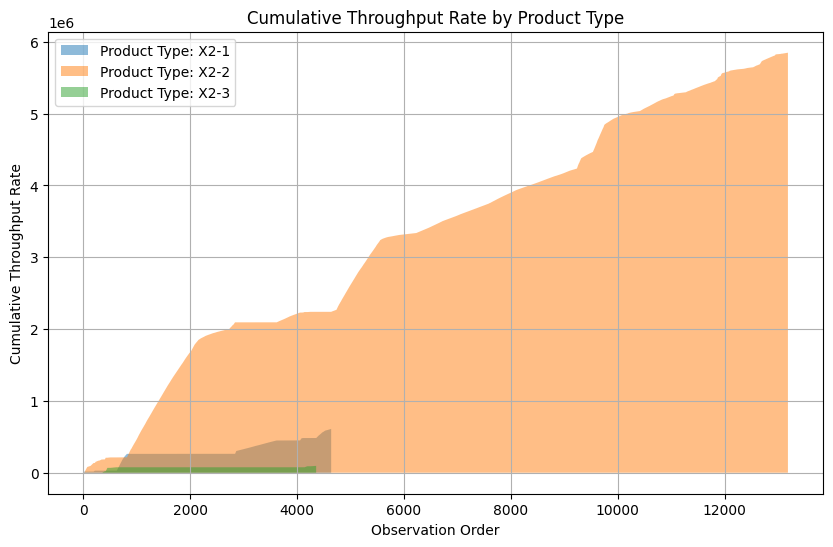

In [4]:
# Group data by product type (X2) and calculate cumulative throughput rate
product_group = data.groupby('X2')['Y'].cumsum()

# Add cumulative sum to the dataset
data['Cumulative_Y_Product'] = product_group

# Plot Area Chart
plt.figure(figsize=(10, 6))
for product_type in data['X2'].unique():
    product_data = data[data['X2'] == product_type]
    plt.fill_between(
        product_data.index,
        product_data['Cumulative_Y_Product'],
        label=f'Product Type: {product_type}',
        alpha=0.5
    )

plt.title('Cumulative Throughput Rate by Product Type')
plt.xlabel('Observation Order')
plt.ylabel('Cumulative Throughput Rate')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px

# Select only numerical columns for PCA
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_data)

# Add PCA results and categorical details to the dataframe
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# 2D PCA Visualization with Interactivity
fig = px.scatter(
    data,
    x='PCA1',
    y='PCA2',
    color='X1',  # Example: Use Machine Type (X1) for color
    hover_data=['X1', 'X2', 'X3', 'X4', 'X5'],  # Tooltip details
    title="PCA Visualization (2D)"
)
fig.update_layout(width=800, height=600)
fig.show()


c:\Users\Soroush\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [7]:
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(numerical_data)

# Add PCA results for 3D
data['PCA3'] = pca_result_3d[:, 2]

# 3D PCA Visualization
fig_3d = px.scatter_3d(
    data,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='X1',
    hover_data=['X1', 'X2', 'X3', 'X4', 'X5'],
    title="PCA Visualization (3D)"
)
fig_3d.update_layout(width=800, height=600)
fig_3d.show()


c:\Users\Soroush\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\Soroush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



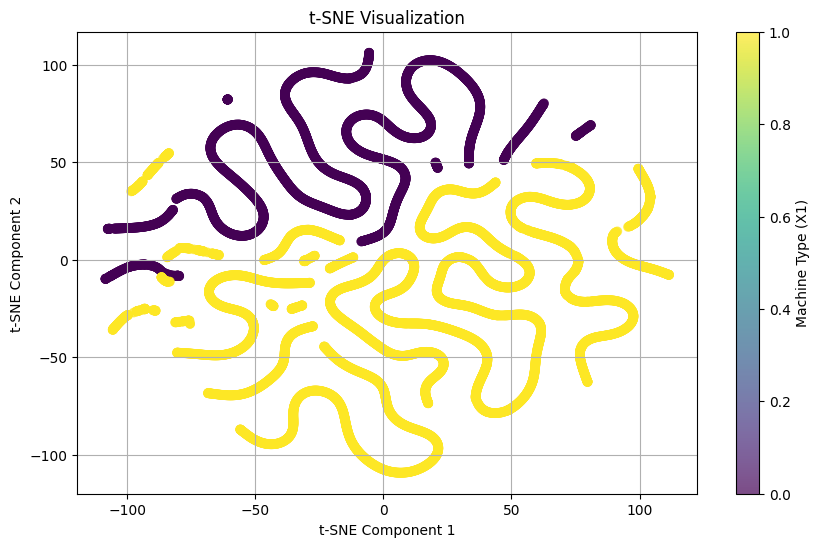

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(numerical_data)

# Add t-SNE results to the dataframe
data['t-SNE1'] = tsne_result[:, 0]
data['t-SNE2'] = tsne_result[:, 1]

# Plot t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['t-SNE1'], data['t-SNE2'], c=data['X1'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Machine Type (X1)')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


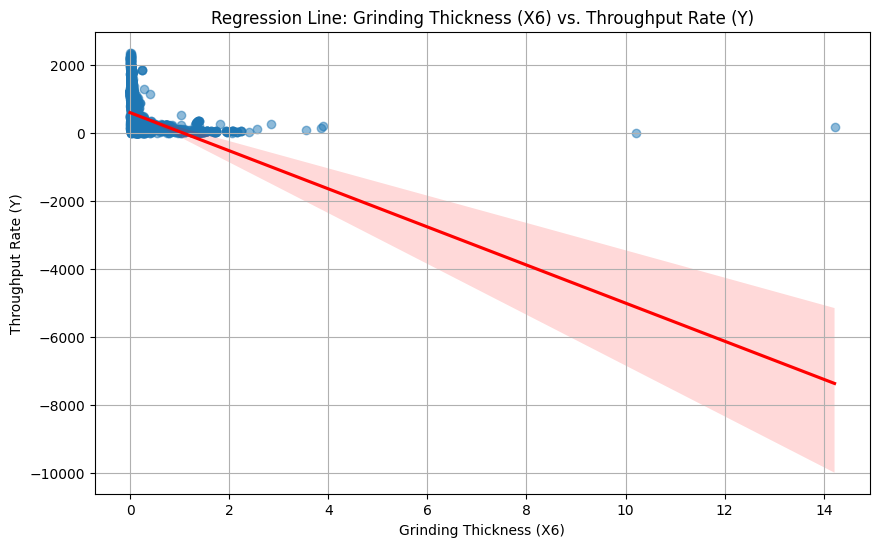

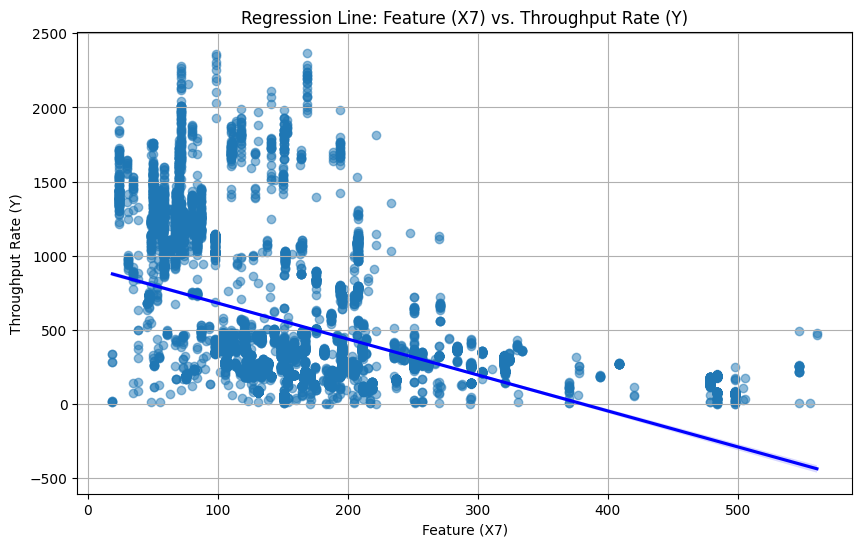

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../Dataset/mixed_categorical_numerical_data.csv'
data = pd.read_csv(file_path)

# Regression Line Plot: X6 vs. Y
plt.figure(figsize=(10, 6))
sns.regplot(x='X6', y='Y', data=data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression Line: Grinding Thickness (X6) vs. Throughput Rate (Y)')
plt.xlabel('Grinding Thickness (X6)')
plt.ylabel('Throughput Rate (Y)')
plt.grid(True)
plt.show()

# Regression Line Plot: X7 vs. Y
plt.figure(figsize=(10, 6))
sns.regplot(x='X7', y='Y', data=data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue'})
plt.title('Regression Line: Feature (X7) vs. Throughput Rate (Y)')
plt.xlabel('Feature (X7)')
plt.ylabel('Throughput Rate (Y)')
plt.grid(True)
plt.show()


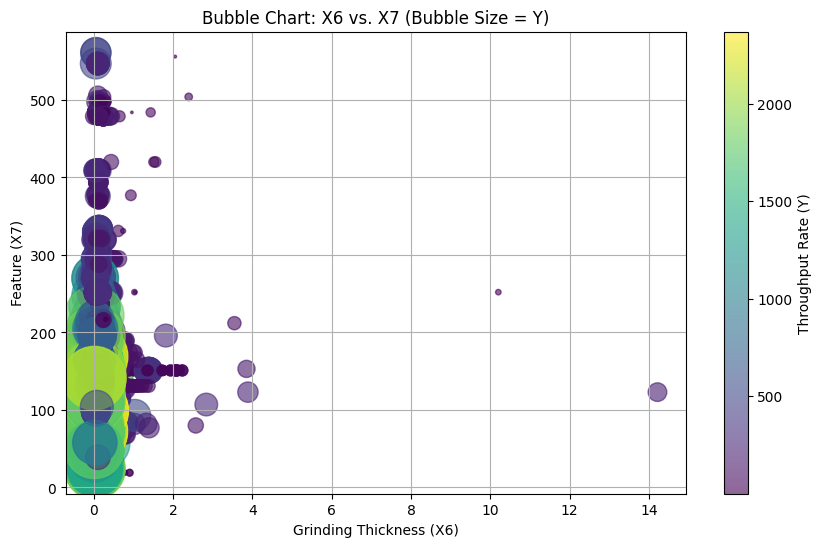

In [7]:
# Bubble Chart: X6 vs. X7, Bubble Size Based on Y
plt.figure(figsize=(10, 6))
bubble = plt.scatter(
    data['X6'], 
    data['X7'], 
    s=data['Y'],  # Bubble size based on Y
    c=data['Y'],  # Bubble color based on Y
    cmap='viridis', 
    alpha=0.6
)
plt.colorbar(bubble, label='Throughput Rate (Y)')
plt.title('Bubble Chart: X6 vs. X7 (Bubble Size = Y)')
plt.xlabel('Grinding Thickness (X6)')
plt.ylabel('Feature (X7)')
plt.grid(True)
plt.show()


In [8]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
file_path = '../Dataset/mixed_categorical_numerical_data.csv'
data = pd.read_csv(file_path)

# Prepare data for Sankey Diagram
# Define categories for X1, X2, and X3
categories = list(data['X1'].unique()) + list(data['X2'].unique()) + list(data['X3'].unique())
category_indices = {category: i for i, category in enumerate(categories)}

# Define links for Sankey
links = {
    'source': [],
    'target': [],
    'value': []
}

# Count transitions between X1 -> X2 -> X3
for x1 in data['X1'].unique():
    for x2 in data['X2'].unique():
        count_x1_x2 = len(data[(data['X1'] == x1) & (data['X2'] == x2)])
        if count_x1_x2 > 0:
            links['source'].append(category_indices[x1])
            links['target'].append(category_indices[x2])
            links['value'].append(count_x1_x2)
            print(links['value'])

for x2 in data['X2'].unique():
    for x3 in data['X3'].unique():
        count_x2_x3 = len(data[(data['X2'] == x2) & (data['X3'] == x3)])
        if count_x2_x3 > 0:
            links['source'].append(category_indices[x2])
            links['target'].append(category_indices[x3])
            links['value'].append(count_x2_x3)

# Create Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=categories
    ),
    link=dict(
        source=links['source'],
        target=links['target'],
        value=links['value']
    )
)])
print(links['value'])
fig.update_layout(title_text="Sankey Diagram: X1 → X2 → X3", font_size=10)
fig.show()


[253]
[253, 4066]
[253, 4066, 1093]
[253, 4066, 1093, 7422]
[253, 4066, 1093, 7422, 352]
[253, 4066, 1093, 7422, 352, 1346, 11119, 250, 115, 4, 102, 30, 220]


In [7]:
# Calculate incoming and outgoing flows
node_flows = {category: {'incoming': 0, 'outgoing': 0} for category in categories}

# Update outgoing flows (based on source)
for i, source in enumerate(links['source']):
    category = categories[source]
    node_flows[category]['outgoing'] += links['value'][i]

# Update incoming flows (based on target)
for i, target in enumerate(links['target']):
    category = categories[target]
    node_flows[category]['incoming'] += links['value'][i]

# Print incoming and outgoing flows
print(f"{'Category':<20} {'Incoming':<10} {'Outgoing':<10}")
print("-" * 40)
for category, flows in node_flows.items():
    print(f"{category:<20} {flows['incoming']:<10} {flows['outgoing']:<10}")


Category             Incoming   Outgoing  
----------------------------------------
X1-1                 0          4319      
X1-2                 0          8867      
X2-1                 1346       1346      
X2-2                 11488      11488     
X2-3                 352        352       
X3-1                 12567      0         
X3-2                 280        0         
X3-3                 335        0         
X3-4                 4          0         


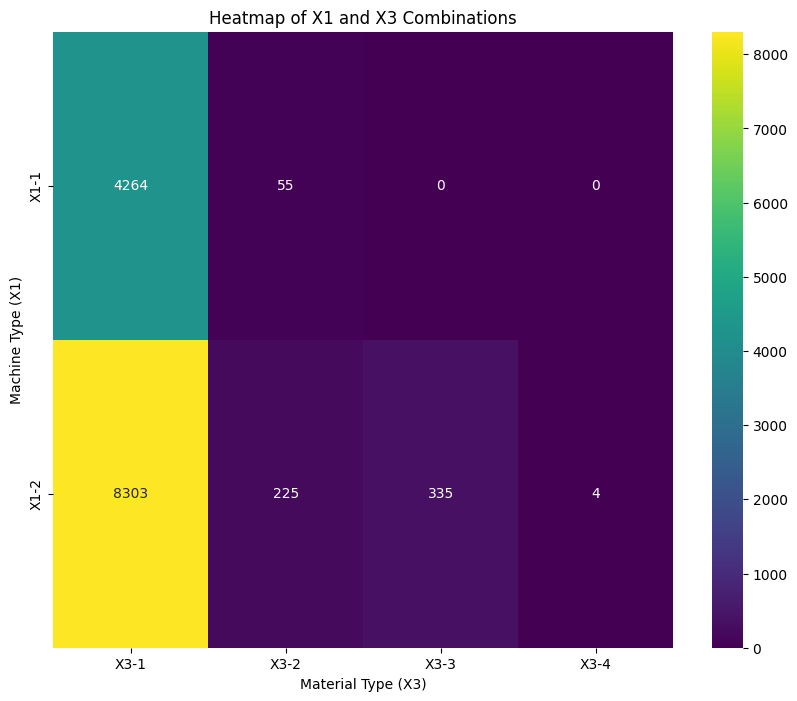

In [5]:
# Count combinations of X1 and X3
heatmap_data_x1_x3 = data.groupby(['X1', 'X3']).size().unstack(fill_value=0)

# Plot Heatmap for X1 and X3
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_x1_x3, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of X1 and X3 Combinations')
plt.xlabel('Material Type (X3)')
plt.ylabel('Machine Type (X1)')
plt.show()


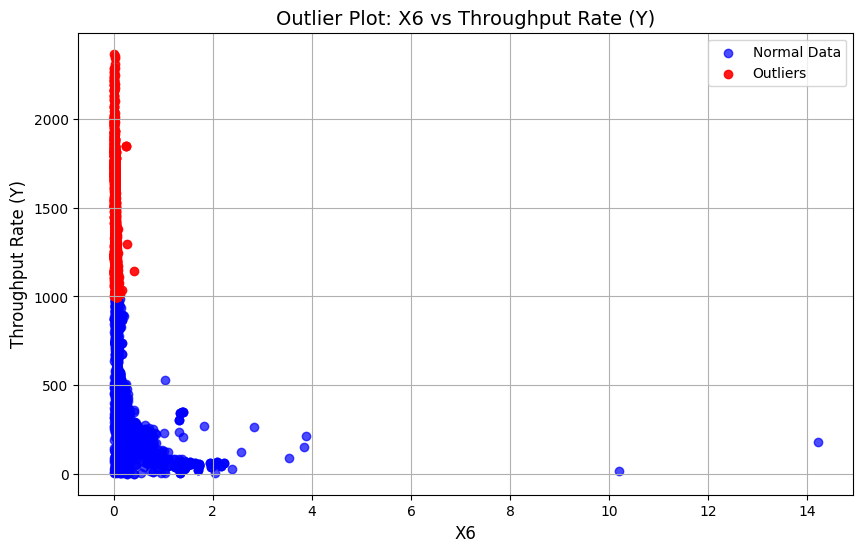

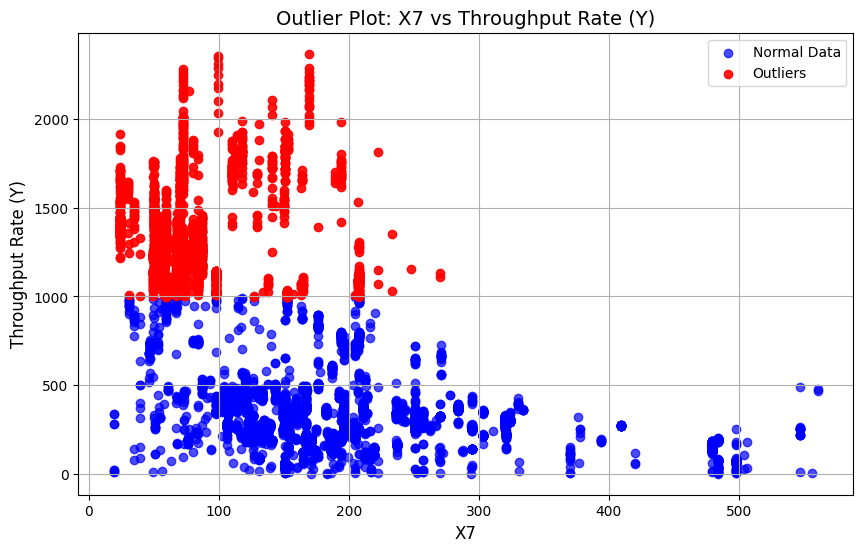

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace with your dataset path)
file_path = '../Dataset/mixed_categorical_numerical_data.csv'
data = pd.read_csv(file_path)

# Select throughput rate (Y) and numerical features (X6, X7)
features = ['X6', 'X7']  # Replace with actual feature column names
throughput_rate = 'Y'    # Replace with the actual throughput column name

# Calculate IQR for throughput rate (Y)
q1 = data[throughput_rate].quantile(0.25)
q3 = data[throughput_rate].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
data['Outlier'] = (data[throughput_rate] < lower_bound) | (data[throughput_rate] > upper_bound)

# Create scatter plots for each numerical feature against throughput rate
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot regular points
    plt.scatter(
        data[feature][~data['Outlier']],
        data[throughput_rate][~data['Outlier']],
        label='Normal Data',
        alpha=0.7,
        color='blue'
    )
    
    # Plot outliers
    plt.scatter(
        data[feature][data['Outlier']],
        data[throughput_rate][data['Outlier']],
        label='Outliers',
        alpha=0.9,
        color='red'
    )
    
    plt.title(f'Outlier Plot: {feature} vs Throughput Rate (Y)', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Throughput Rate (Y)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


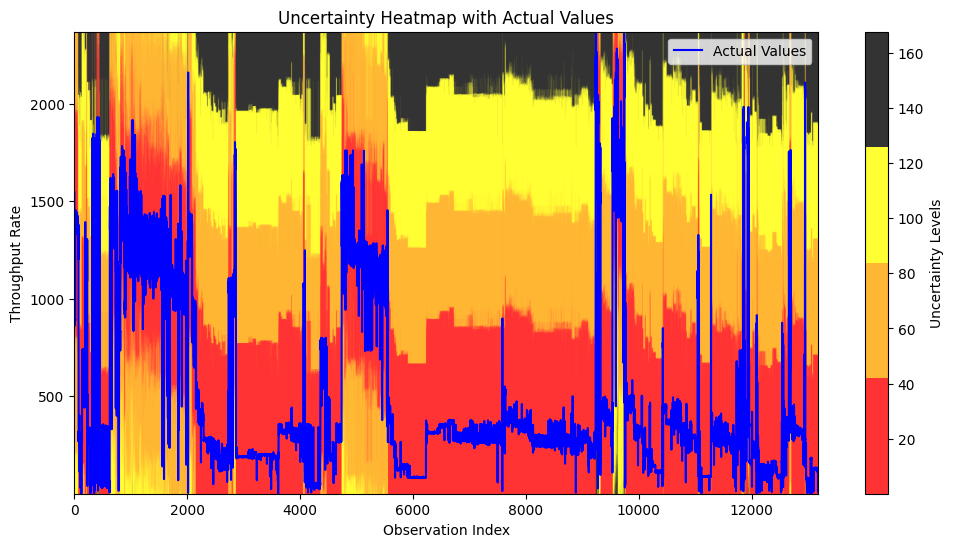

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Extract relevant columns
x = np.arange(len(data))  # Observations as the x-axis
y_actual = data['Y']  # Actual throughput rates as Y values
uncertainty = data['X6']  # Column representing uncertainty levels

# Define upper and lower bounds for uncertainty
upper_bound = y_actual + uncertainty
lower_bound = y_actual - uncertainty

# Create a meshgrid for the heatmap
y_range = np.linspace(y_actual.min(), y_actual.max(), 500)
heatmap = np.zeros((500, len(x)))

# Populate the heatmap with gradient based on distance from bounds
for i, yi in enumerate(y_range):
    # Closer to upper or lower bound gets higher intensity (red)
    heatmap[i, :] = np.maximum(0, 1 - np.minimum(
        (upper_bound - yi) / uncertainty.max(),
        (yi - lower_bound) / uncertainty.max()
    ))

# Custom colormap (black -> purple -> yellow -> red)
# cmap = ListedColormap(['black', 'purple', 'yellow', 'red'])
cmap = ListedColormap(['red', 'orange', 'yellow', 'black'])

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Heatmap
extent = [x.min(), x.max(), y_range.min(), y_range.max()]  # Set extent to span x and y range
img = ax.imshow(heatmap, cmap=cmap, aspect='auto', extent=extent, origin='lower', alpha=0.8)

# Overlay the actual values plot
ax.plot(x, y_actual, color='blue', label='Actual Values', linewidth=1.5)

# Customization
ax.set_title('Uncertainty Heatmap with Actual Values')
ax.set_xlabel('Observation Index')
ax.set_ylabel('Throughput Rate')
ax.legend()

# Colorbar
cbar = plt.colorbar(img, ax=ax, orientation='vertical')
cbar.set_label('Uncertainty Levels')

plt.show()
